In [1]:
from models import *
from functions import *
from plotting import *

import numpy as np
import cool_maps.plot as cplt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cmocean.cm as cmo

c:\Users\matth\OneDrive\Documents\GitHub\GGS\plotting.py:125: SyntaxWarning: invalid escape sequence '\m'
  cbar = plt.colorbar(contourf, label="velocity ($\mathregular{ms^{-1}}$)")
c:\Users\matth\OneDrive\Documents\GitHub\GGS\plotting.py:187: SyntaxWarning: invalid escape sequence '\m'
  "0.2 - 0.3 $\mathregular{ms^{-1}}$",
c:\Users\matth\OneDrive\Documents\GitHub\GGS\plotting.py:188: SyntaxWarning: invalid escape sequence '\m'
  "0.3 - 0.4 $\mathregular{ms^{-1}}$",
c:\Users\matth\OneDrive\Documents\GitHub\GGS\plotting.py:189: SyntaxWarning: invalid escape sequence '\m'
  "0.4 - 0.5 $\mathregular{ms^{-1}}$",
c:\Users\matth\OneDrive\Documents\GitHub\GGS\plotting.py:190: SyntaxWarning: invalid escape sequence '\m'
  "0.5 - " + max_label + " $\mathregular{ms^{-1}}$",


In [2]:
dates = ('2024-11-8', '2024-11-08')
depth = 1000
lon_min = -77
lon_max = -60
lat_min = 36
lat_max = 45

extent = (lat_min, lon_min, lat_max, lon_max)

In [3]:
espc = ESPC()
espc.load()
espc.subset(dates, extent, depth)
espc.data
espc.interpolated_data = interpolate_depth(espc.data)
espc.da_data = depth_average(espc.interpolated_data)

Loading ESPC data...
Start time (UTC): 2024-11-09 05:08:20.340155+00:00
Done.
End time (UTC): 2024-11-09 05:08:20.808017+00:00
Runtime: 0:00:00.467862

Subsetted ESPC data.

ESPC: Interpolating depth...
Start time (UTC): 2024-11-09 05:08:20.990549+00:00
Done.
End time (UTC): 2024-11-09 05:08:57.184923+00:00
Runtime: 0:00:36.194374

Depth averaging...
Start time (UTC): 2024-11-09 05:08:57.241102+00:00
Done.
End time (UTC): 2024-11-09 05:09:06.270344+00:00
Runtime: 0:00:09.029242



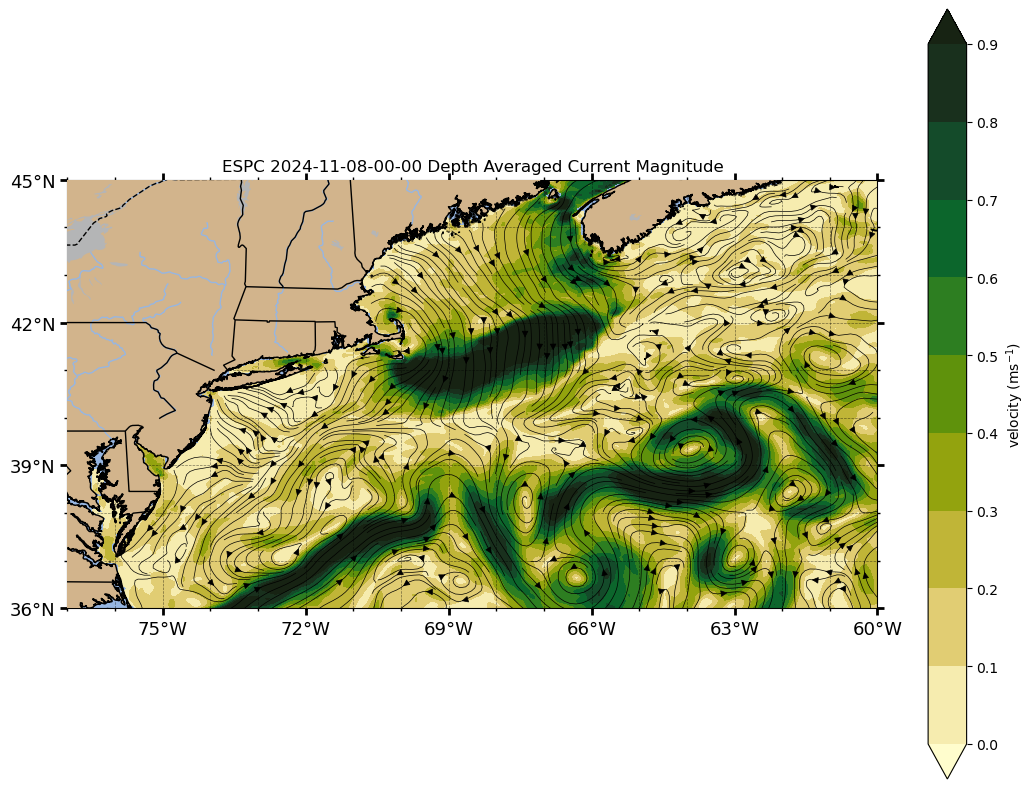

In [4]:
espc_t0 = espc.da_data.isel(time=0)

plot_magnitude(espc_t0, extent, streamlines=True, density=4, quiver=True, scalar=4)

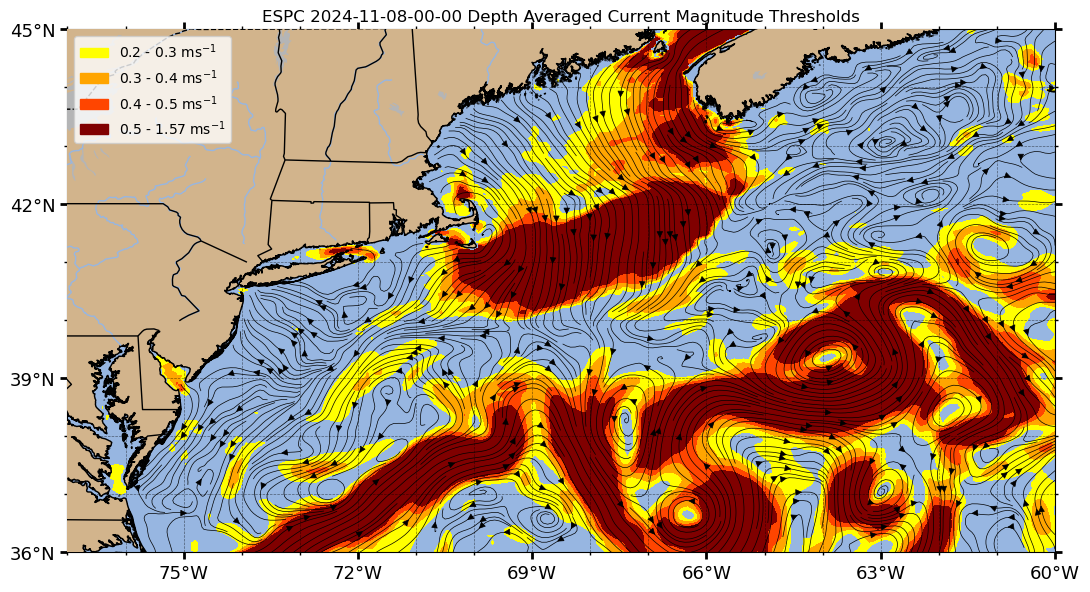

In [9]:
plot_threshold(espc_t0, extent, streamlines=True, density=6, quiver=True, scalar=4)

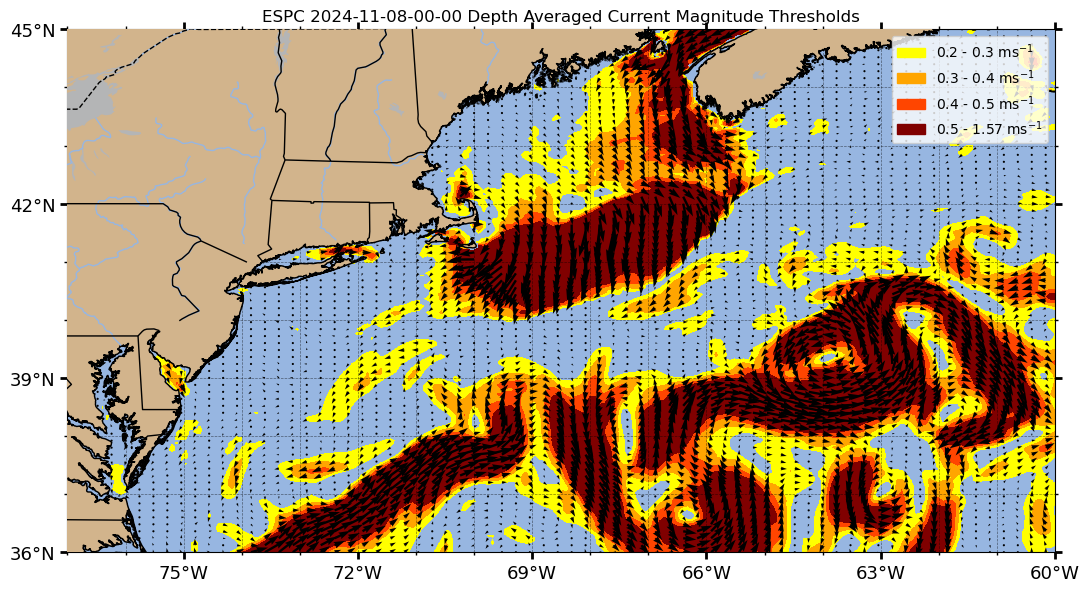

In [8]:
plot_threshold(espc_t0, extent, streamlines=False, density=4, quiver=True, scalar=3)

In [10]:
rtofs = RTOFS()
rtofs.load('east')
rtofs.raw_data
rtofs.subset(dates, extent, depth)
rtofs.interpolated_data = interpolate_depth(rtofs.data)
rtofs.da_data = depth_average(rtofs.interpolated_data)

Loading RTOFS data...
Start time (UTC): 2024-11-09 05:13:04.641144+00:00
Done.
End time (UTC): 2024-11-09 05:13:10.797674+00:00
Runtime: 0:00:06.156530

Subsetted RTOFS data.

RTOFS (East Coast): Interpolating depth...
Start time (UTC): 2024-11-09 05:13:12.412600+00:00
Done.
End time (UTC): 2024-11-09 05:13:19.363465+00:00
Runtime: 0:00:06.950865

Depth averaging...
Start time (UTC): 2024-11-09 05:13:19.364973+00:00
Done.
End time (UTC): 2024-11-09 05:13:20.886817+00:00
Runtime: 0:00:01.521844



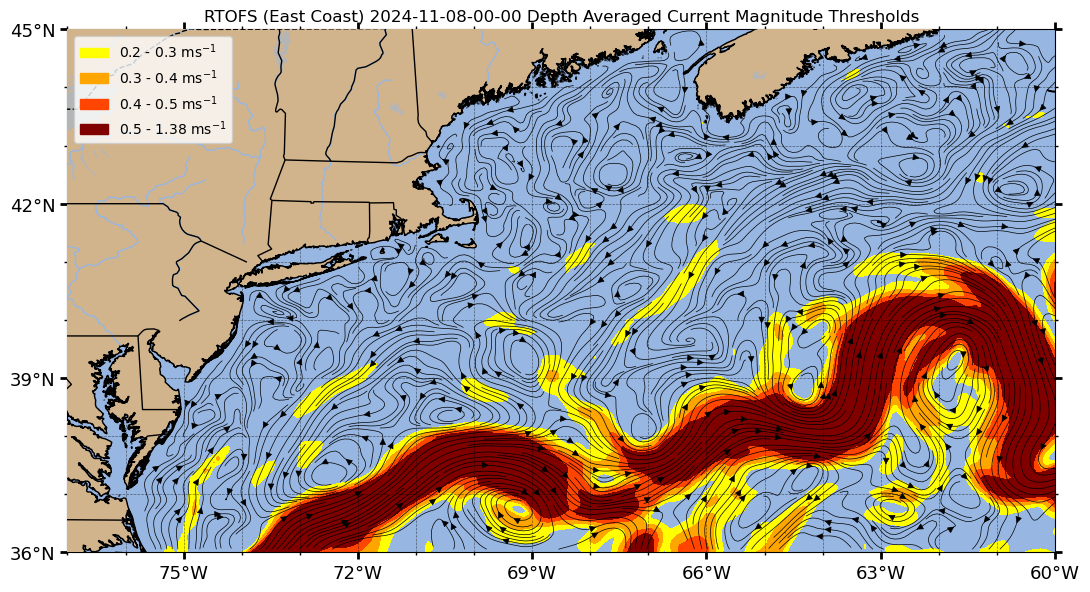

In [11]:
rtofs_t0 = rtofs.da_data.isel(time=0)

plot_threshold(rtofs_t0, extent, streamlines=True, density=6, quiver=False, scalar=3)

In [12]:
cmems = CMEMS()
cmems.load()
cmems.subset(dates, extent, depth)
cmems.interpolated_data = interpolate_depth(cmems.data)
cmems.da_data = depth_average(cmems.interpolated_data)

Loading CMEMS data...
Start time (UTC): 2024-11-09 05:16:05.511488+00:00


INFO - 2024-11-09T05:16:06Z - Dataset version was not specified, the latest one was selected: "202406"
INFO - 2024-11-09T05:16:06Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-11-09T05:16:09Z - Service was not specified, the default one was selected: "arco-geo-series"


Done.
End time (UTC): 2024-11-09 05:16:14.332386+00:00
Runtime: 0:00:08.820898

Subsetted CMEMS data.

CMEMS: Interpolating depth...
Start time (UTC): 2024-11-09 05:16:14.508410+00:00
Done.
End time (UTC): 2024-11-09 05:17:47.496514+00:00
Runtime: 0:01:32.988104

Depth averaging...
Start time (UTC): 2024-11-09 05:17:47.497510+00:00
Done.
End time (UTC): 2024-11-09 05:17:48.435625+00:00
Runtime: 0:00:00.938115



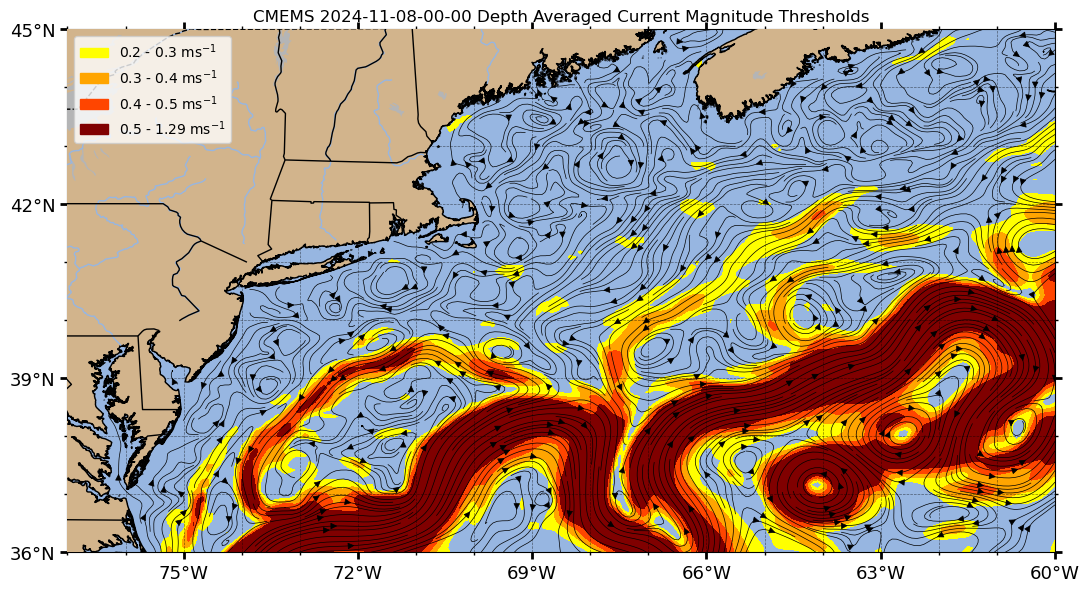

In [13]:
cmems_t0 = cmems.da_data.isel(time=0)

plot_threshold(cmems_t0, extent, streamlines=True, density=6, quiver=False, scalar=3)

In [ ]:
rtofs_da = rtofs.da_data.isel(time=0)
lon, lat = rtofs_da.lon, rtofs_da.lat # lat and lon are already 2D for RTOFS
u = rtofs_da.u
v = rtofs_da.v
mag = rtofs_da.magnitude

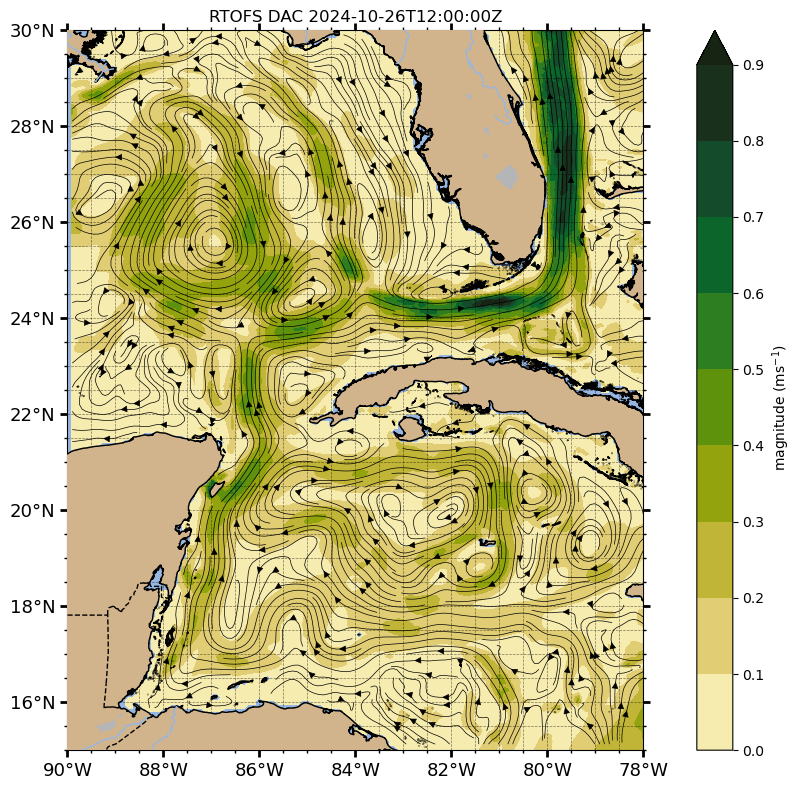

In [58]:
cplt.create([lon_min, lon_max, lat_min, lat_max], gridlines = True, proj = ccrs.PlateCarree())

contourf = plt.contourf(lon, lat, mag, levels = np.linspace(0, 0.9, 10), extend = 'max', cmap = cmo.speed, transform = ccrs.PlateCarree(), vmax=0.9)
streamplot = plt.streamplot(lon, lat, u, v, density = 4, linewidth = 0.5, color = 'black', transform = ccrs.PlateCarree())
cbar = plt.colorbar(contourf, label = 'magnitude ($\mathregular{ms^{-1}}$)')
plt.title('RTOFS DAC 2024-10-26T12:00:00Z')

plt.tight_layout();

In [ ]:
max_mag = np.nanmax(mag)
max_label = f'{max_mag:.2f}' # converts max_mag to a string with 2 decimal places

levels = [0, 0.2, 0.3, 0.4, 0.5, max_mag]
colors = ['none', 'yellow', 'orange', 'orangered', 'maroon']
labels = [None, 
          '0.2 - 0.3 $\mathregular{ms^{-1}}$',
          '0.3 - 0.4 $\mathregular{ms^{-1}}$', 
          '0.4 - 0.5 $\mathregular{ms^{-1}}$', 
          '0.5 - ' + max_label + ' $\mathregular{ms^{-1}}$']

patches = []
for color, label in zip(colors, labels):
    if label:
        patches.append(mpatches.Patch(color=color, label=label))

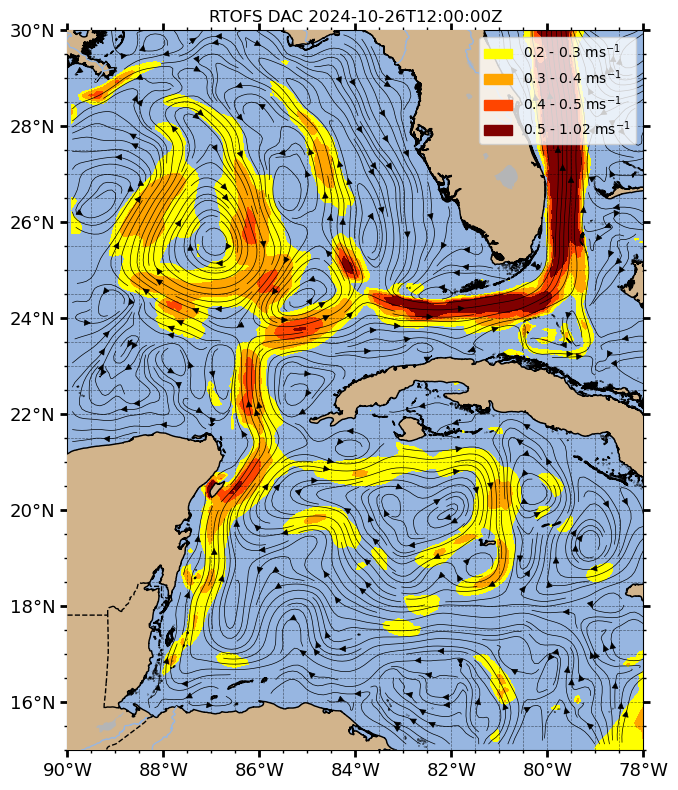

In [ ]:
cplt.create([lon_min, lon_max, lat_min, lat_max], gridlines = True, proj = ccrs.PlateCarree())

contourf = plt.contourf(lon, lat, mag, levels = levels, extend = 'both', colors = colors, transform = ccrs.PlateCarree())
streamplot = plt.streamplot(lon, lat, u, v, density = 4, linewidth = 0.5, color = 'black', transform = ccrs.PlateCarree())
legend = plt.legend(handles = patches, loc='upper right')
legend.set_zorder(100)
plt.title('RTOFS DAC 2024-10-26T12:00:00Z')

plt.tight_layout();

In [24]:
scalar = 2
u_sub = u[::scalar, ::scalar]
v_sub = v[::scalar, ::scalar]
lon_sub = lon[::scalar, ::scalar]
lat_sub = lat[::scalar, ::scalar]

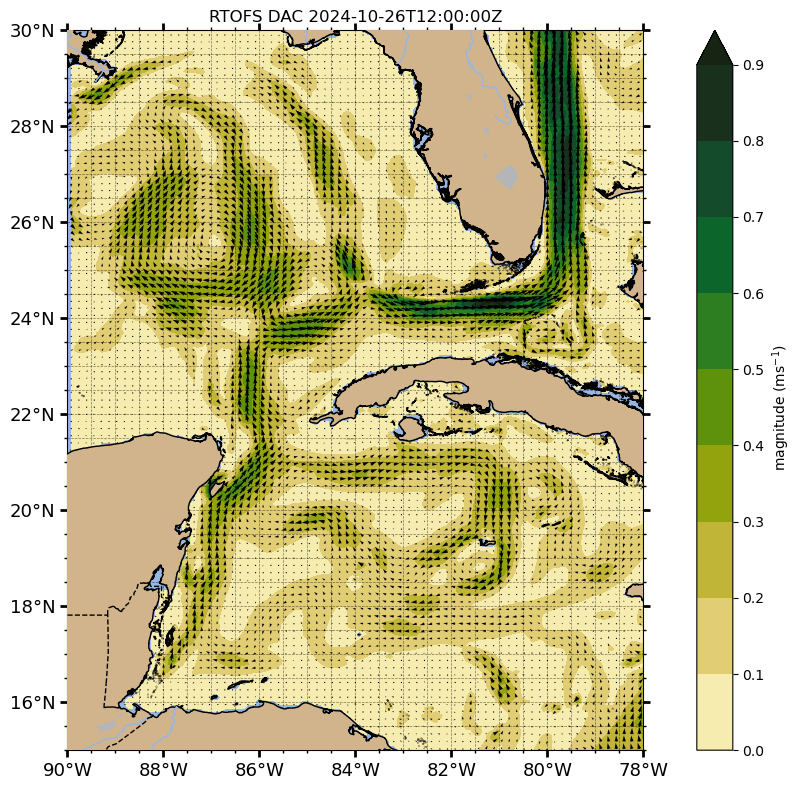

In [57]:
cplt.create([lon_min, lon_max, lat_min, lat_max], gridlines = True, proj = ccrs.PlateCarree())

contourf = plt.contourf(lon, lat, mag, levels = np.linspace(0, 0.9, 10), extend = 'max', cmap = cmo.speed, transform = ccrs.PlateCarree(), vmax=0.9)
quiver = plt.quiver(lon_sub, lat_sub, u_sub, v_sub, transform = ccrs.PlateCarree())
cbar = plt.colorbar(contourf, label = 'magnitude ($\mathregular{ms^{-1}}$)')
plt.title('RTOFS DAC 2024-10-26T12:00:00Z')

plt.tight_layout();

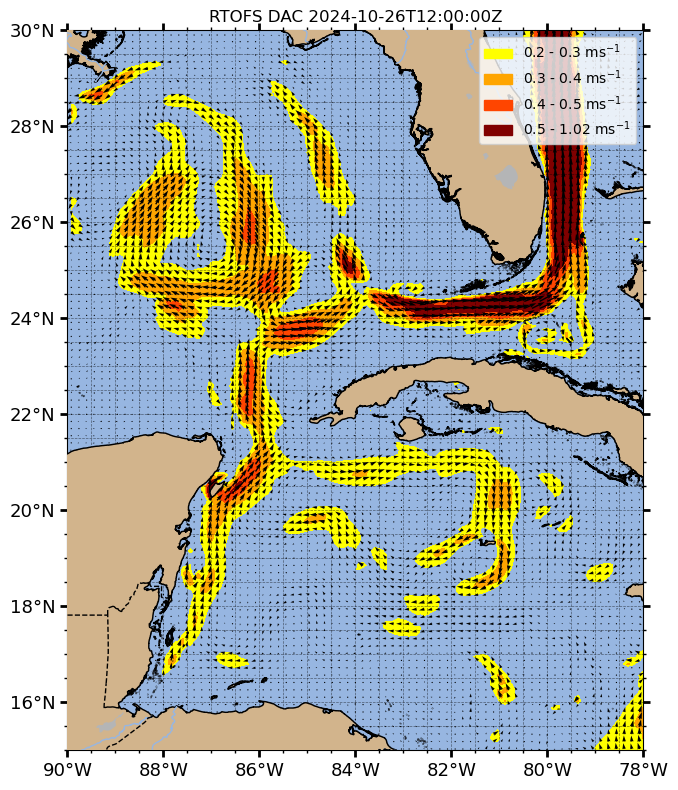

In [56]:
cplt.create([lon_min, lon_max, lat_min, lat_max], gridlines = True, proj = ccrs.PlateCarree())

contourf = plt.contourf(lon, lat, mag, levels = levels, extend = 'both', colors = colors, transform = ccrs.PlateCarree())
quiver = plt.quiver(lon_sub, lat_sub, u_sub, v_sub, transform = ccrs.PlateCarree())
legend = plt.legend(handles = patches, loc='upper right')
legend.set_zorder(100)
plt.title('RTOFS DAC 2024-10-26T12:00:00Z')

plt.tight_layout();

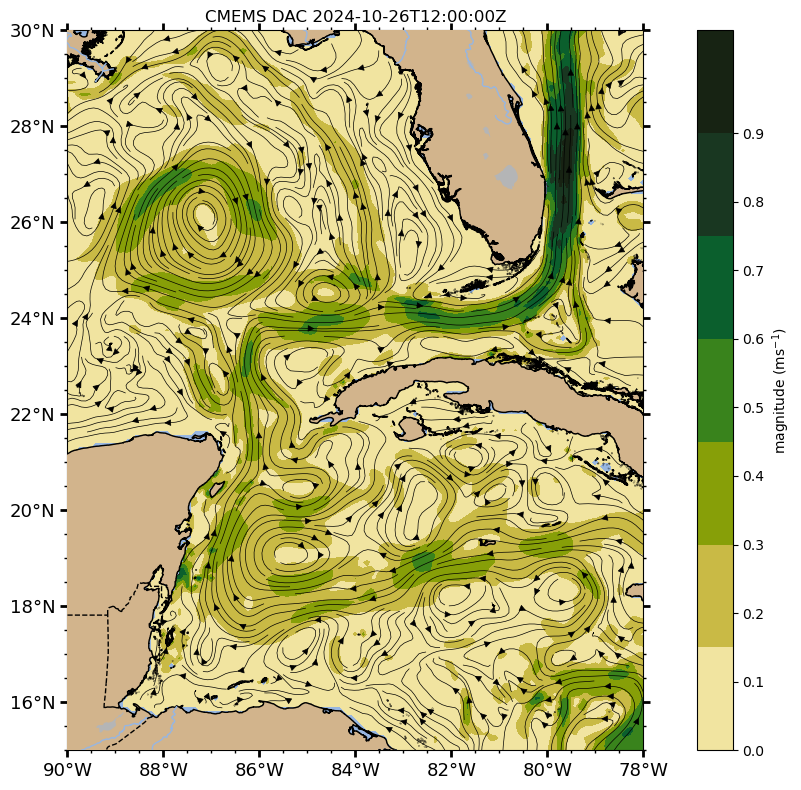

In [24]:
cplt.create([lon_min, lon_max, lat_min, lat_max], proj = ccrs.PlateCarree())

contourf = plt.contourf(lon, lat, da_mag, cmap = cmo.speed, transform = ccrs.PlateCarree(), vmax=0.9)
streamplot = plt.streamplot(lon, lat, cmems_dac.u, cmems_dac.v, density = 4, linewidth = 0.5, color = 'black', transform = ccrs.PlateCarree())
streamplot.lines.set_alpha(1.0)
cbar = plt.colorbar(contourf, label = 'magnitude ($\mathregular{ms^{-1}}$)', extend='max')
cbar.set_ticks(np.linspace(0, 0.9, 10))  # 10 tick locations
plt.title('CMEMS DAC 2024-10-26T12:00:00Z')

plt.tight_layout()